In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [16]:
d = pd.read_csv('./test.csv')

In [18]:
d

,Pressure,Dry Poly,Flow Rate,OPC Counts,Degree Turn
0,995,0.83,0.84,TRUE,0
1,995,0.82,0.83,TRUE,15
2,995,0.81,0.81,TRUE,30
3,995,0.80,0.80,TRUE,45
4,974,0.66,0.68,TRUE,60
5,925,0.41,0.45,TRUE,65
6,866,0.06,0.18,Low,70
7,832,-0.11,0.06,Very low,75
8,814,-0.20,0.00,FALSE,76
9,806,-0.20,0.00,FALSE,77


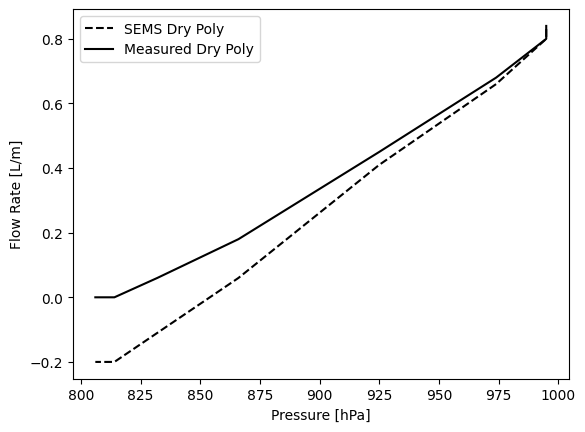

In [26]:
fig, ax = plt.subplots()
ax.plot(d['Pressure'], d['Dry Poly'], label='SEMS Dry Poly', c='black', ls='--')
ax.plot(d['Pressure'], d['Flow Rate'], label='Measured Dry Poly', c='black')
ax.set_xlabel('Pressure [hPa]')
ax.set_ylabel('Flow Rate [L/m]')
ax.legend()
fig.savefig('./figures/pressure_flow.png', dpi=300)

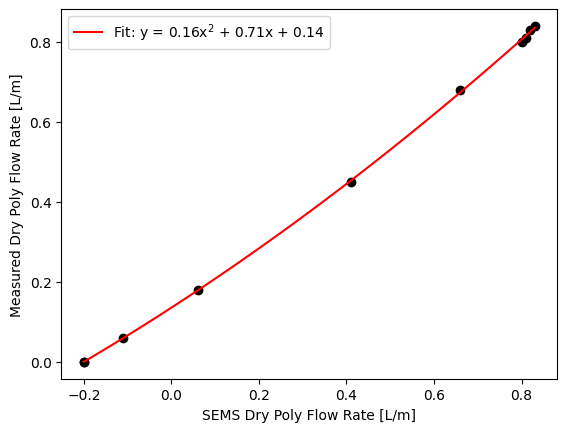

In [62]:
fig, ax = plt.subplots()
ax.scatter(d['Dry Poly'], d['Flow Rate'], c='black')
ax.set_ylabel('Measured Dry Poly Flow Rate [L/m]')
ax.set_xlabel('SEMS Dry Poly Flow Rate [L/m]')


x = d['Dry Poly']
y = d['Flow Rate']


# Perform linear regression using numpy
coefficients = np.polyfit(x, y, 2)  # 1 means linear fit
poly = np.poly1d(coefficients)

# Generate values for the fit line
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = poly(x_fit)

ax.plot(x_fit, y_fit, '-', c='red', label='Fit: y = {:.2f}x$^2$ + {:.2f}x + {:.2f}'.format(coefficients[0], coefficients[1], coefficients[2]))

ax.legend()
fig.savefig('./figures/pressure_flow-fit.png', dpi=300)